In [15]:
__author__ = "@Tssp"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from scipy.interpolate import 
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

In [2]:
# Parameters and Constants:
delta, asc = np.loadtxt('Data/citaold2h/python/delta_asc.txt')
delta = delta.tolist()
delta[40] = Decimal('0.7100')
asc = asc.tolist()
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
kx = 2*np.pi/lambd
Ix = 4993 * (1e4 / Eh * to * ao**2)
Vx = alpha * Ix # a.u
Ix = Vx/alpha
wx = np.sqrt( 2 * Vx * kx**2 / mass)       
dho = np.sqrt(2 / (mass * wx))
print('wx [u.a]: ', wx/to)
print('dho [u.a]: ', dho)

wx [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [3]:
x = dho / asc

In [4]:
print(os.getcwd())
folder_path = "Data/citaold2h/eva/ix4993_iy4993_iz50/"

/Users/tomy/PhD/Ultracold_Atoms_src


In [5]:
Data = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix4993_iy4993_iz50_LiLi_a3Sup_{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva'))
    except:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix4993_iy4993_iz50_LiLi_a3Sup_{d}0_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva'))

In [6]:
L = Data[0].shape[0]
l = len(Data)

In [7]:
def transpose_energies(Data):
    '''Inputs the Data list and outputs a dictionary with the evolution of the energy levels
       with respect the scattering length'''
    L = Data[0].shape[0]
    l = len(Data)
    dic = {}
    for j in range(L):
        out = list()
        for i in range(l):
            out.append(Data[i][:,2][j])
        dic['nivel_{}'.format(j)] = out
    return dic

In [8]:
dic = transpose_energies(Data)

In [9]:
def dic_from_least_bound_forward(dic):
    for i in range(L):
        if dic['nivel_{}'.format(i)][0] > 0:
            print("Least bound state: ", i-1, dic['nivel_{}'.format(i-1)][0]/wx)
            print("First trap state: ", i, dic['nivel_{}'.format(i)][0]/wx)
            break
    for j in range(1, i):
        del dic['nivel_{}'.format(j-1)]
    return dic, i-1

In [10]:
dic, least_bound_pos = dic_from_least_bound_forward(dic)

Least bound state:  1050 -0.04280869040846291
First trap state:  1051 0.09578983477554576


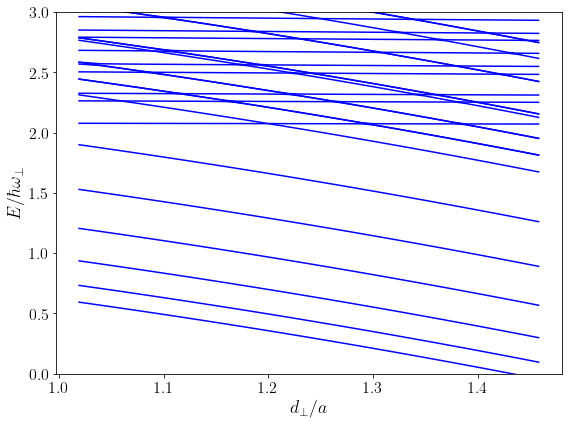

In [402]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wx, 'b')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{\perp}/a$')
ax.set_ylabel('$E/\hbar \omega_{\perp}$')
plt.tight_layout()
fig.savefig('General_figures/Ix4993_Iy4993_Iz50/Ix4993_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

# Crosses

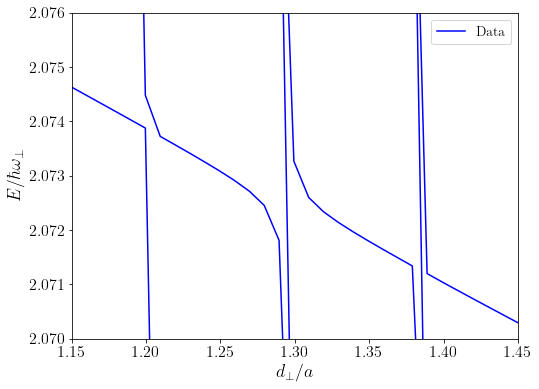

In [399]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos + 6, least_bound_pos + 12):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wx, 'b')
ax2.set_ylim(2.07, 2.076)
ax2.set_xlim(1.15, 1.45)
ax2.set_xlabel('$d_{\perp}/a$')
ax2.set_ylabel('$E/\hbar \omega_{\perp}$')
ax2.legend(['Data'], fontsize=14)
plt.show()

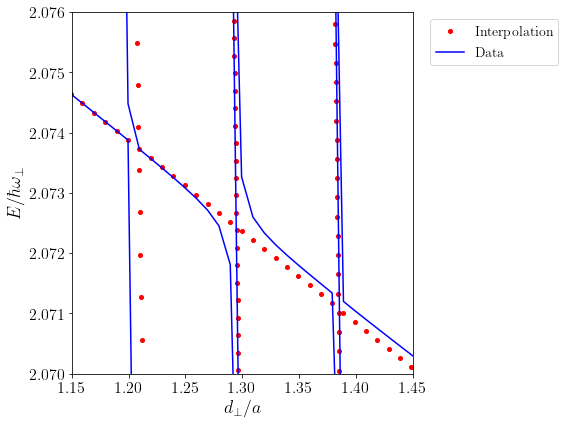

In [401]:
fig3, ax3 = plt.subplots(figsize=(8,6))
# nivel 1056:
f1056 = np.polyfit(x[x < 1.2], np.array(dic['nivel_1056'])[x < 1.2]/wx, deg=1)
ax3.plot(x, np.polyval(f1056, x), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1056']/wx, 'b')

# nivel 1057:
f1057 = np.polyfit(x[x < 1.2], np.array(dic['nivel_1057'])[x < 1.2]/wx, deg=1)
x1057 = np.linspace(1, 1.3, num=500)
ax3.plot(x1057, np.polyval(f1057, x1057), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1057']/wx, 'b')

# nivel 1058:
f1058 = np.polyfit(x[(x > 1.2) & (x < 1.3)], np.array(dic['nivel_1058'])[(x > 1.2) & (x < 1.3)]/wx, deg=1)
x1058 = np.linspace(1.2, 1.3, num=500)
ax3.plot(x1058, np.polyval(f1058, x1058), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1058']/wx, 'b')

# nivel 1059:
# proviene del mismo que el 1058
ax3.plot(x, dic['nivel_1059']/wx, 'b')

# nivel 1060:
f1060 = np.polyfit(x[(x > 1.3)], np.array(dic['nivel_1060'])[(x > 1.3)]/wx, deg=1)
x1060 = np.linspace(1.3, 1.4, num=500)
ax3.plot(x1060, np.polyval(f1060, x1060), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1060']/wx, 'b')

# nivel 1061:
# proviene del mismo que el 1060:
ax3.plot(x, dic['nivel_1061']/wx, 'b')


ax3.set_xlabel('$d_{\perp}/a$')
ax3.set_ylabel('$E/\hbar \omega_{\perp}$')
ax3.legend(['Interpolation', 'Data'], fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2.07, 2.076)
ax3.set_xlim(1.15, 1.45)
plt.tight_layout()
fig3.savefig('General_figures/Ix4993_Iy4993_Iz50/Ix4993_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)